In [2]:
!pip install PySimpleGUI
import numpy as np
import cv2
import PySimpleGUI as sg
import os.path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 5.2 MB/s 


In [10]:
version = '7 June 2020'
prototxt = r'/content/colorization_deploy_v2.prototxt'
model = r'/content/colorization_release_v2.caffemodel'
points = r'/content/pts_in_hull.npy'

points = os.path.join(os.path.dirname('__file__'), points)
prototxt = os.path.join(os.path.dirname('__file__'), prototxt)
model = os.path.join(os.path.dirname('__file__'), model)



In [5]:
!pwd

/content


In [18]:
img_path = '/content/german-panzer-iv-in-africa-1941-CPM3YF.jpg'

In [15]:
net = cv2.dnn.readNetFromCaffe(prototxt, model)

In [17]:
kernel = np.load(points)

In [19]:
img = cv2.imread(img_path)

In [21]:
img.show()

AttributeError: ignored

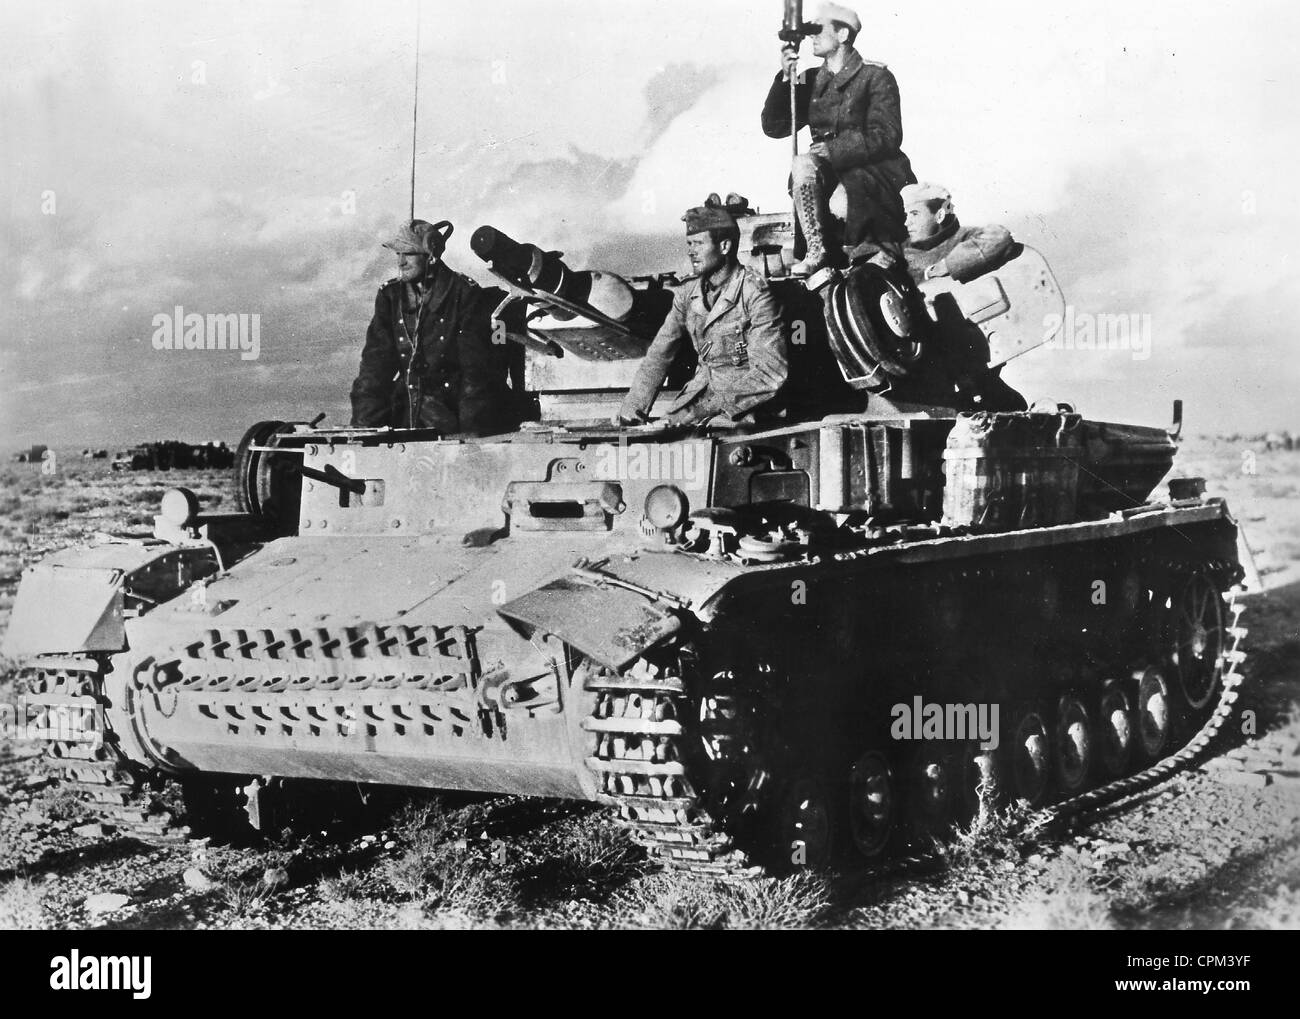

In [28]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [29]:
scaled = img.astype("float32")/ 255.0

In [32]:
lab_img = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)

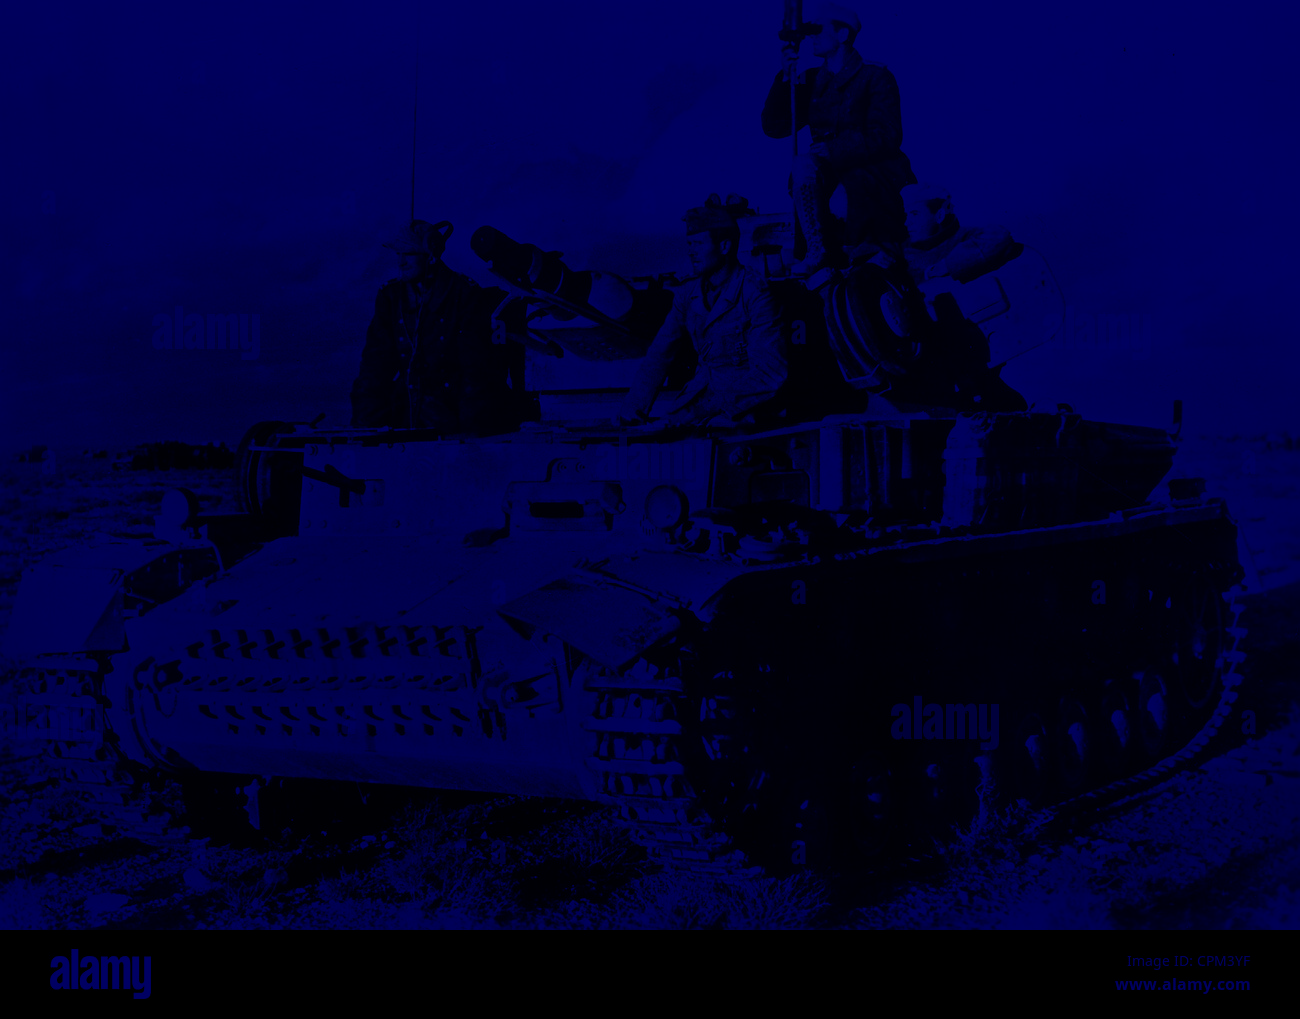

In [33]:
cv2_imshow(lab_img)

In [34]:
layer = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = kernel.transpose().reshape(2,313,1,1)

In [36]:
net.getLayer(layer).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1,313], 2.606,dtype = "float32")]

In [37]:
resized = cv2.resize(lab_img, (224,224))
L = cv2.split(resized)[0]

L-=50

In [42]:
net.setInput(cv2.dnn.blobFromImage(L))
ab_channel = net.forward()[0,:,:,:].transpose((1,2,0))

ab_channel = cv2.resize(ab_channel, (img.shape[1], img.shape[0]))

In [43]:
L = cv2.split(lab_img)[0]

In [46]:
colorized = np.concatenate((L[:, :, np.newaxis], ab_channel), axis=2)
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
colorired = np.clip(colorized, 0, 1)
colorized = (255 * colorized).astype("uint8")

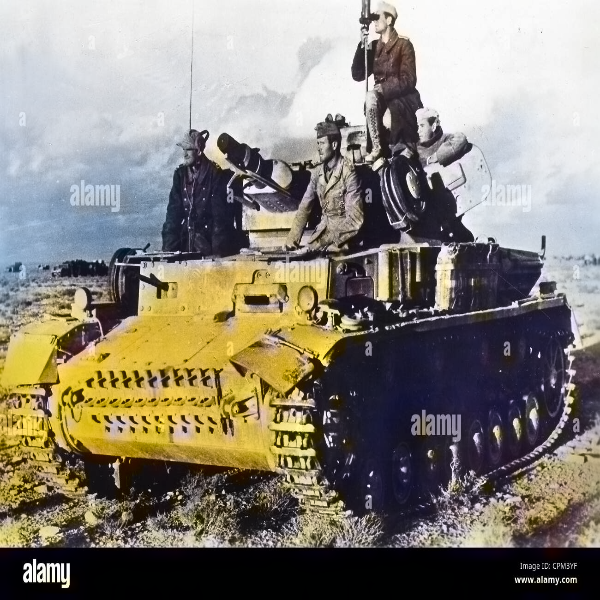

In [49]:
img = cv2.resize(img, (600,600))
colorized = cv2.resize(colorized, (600,600))

result = cv2.hconcat([img,colorized])

cv2_imshow(colorized)

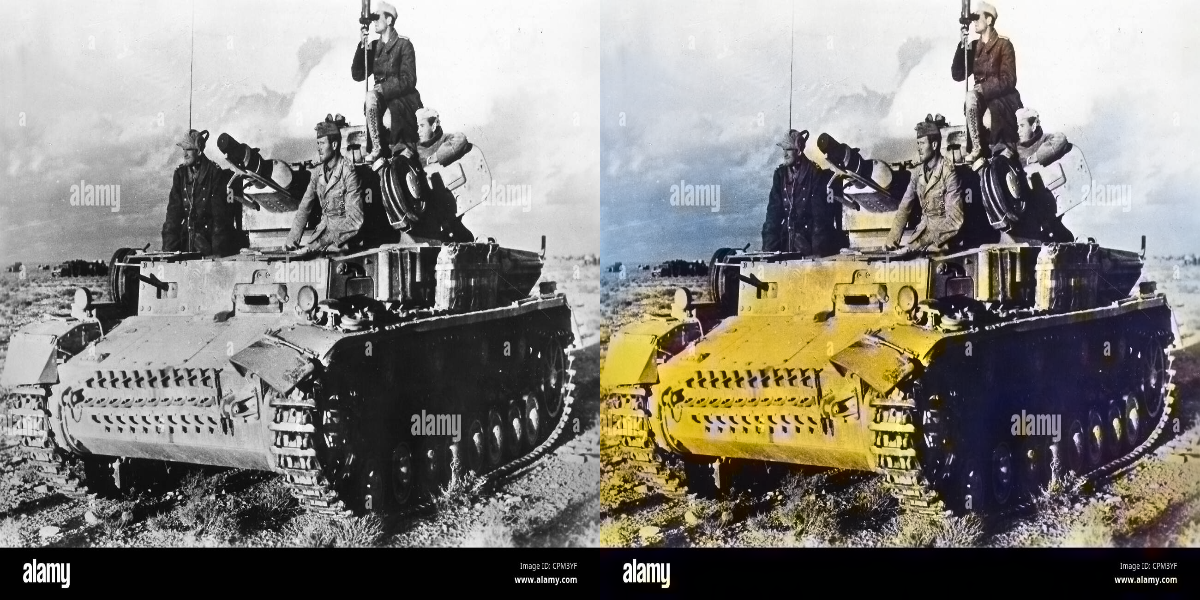

In [48]:
cv2_imshow(result)